In [1]:
import pandas as pd

# Load datasets
file_paths = {
    "Global_PCOS_Demographics": "Global_PCOS_Demographics_Cleaned.csv",
    "PCOS_Medication_Reactions": "PCOS_Medication_Reactions_Cleaned.csv",
    "Lifestyle_Diet_Dataset": "Lifestyle_Diet_Dataset_Cleaned.csv",
    "Core_PCOS_Dataset": "Core_PCOS_Dataset_Cleaned.csv",
}

datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

dataset_summary = {}
for name, df in datasets.items():
    dataset_summary[name] = {
        "Shape": df.shape,
        "Columns": df.columns.tolist(),
        "Missing Values": df.isnull().sum().sum(),
        "First Rows": df.head()
    }

dataset_summary


{'Global_PCOS_Demographics': {'Shape': (84118, 17),
  'Columns': ['Country',
   'Age',
   'BMI',
   'Menstrual_Regularity',
   'Hirsutism',
   'Acne_Severity',
   'Family_History_of_PCOS',
   'Insulin_Resistance',
   'Lifestyle_Score',
   'Stress_Levels',
   'Urban_Rural',
   'Socioeconomic_Status',
   'Awareness_of_PCOS',
   'Fertility_Concerns',
   'Undiagnosed_PCOS_Likelihood',
   'Ethnicity',
   'Diagnosis'],
  'Missing Values': 41992,
  'First Rows':       Country  Age          BMI Menstrual_Regularity Hirsutism Acne_Severity  \
  0  Madagascar   26   overweight              regular       yes        severe   
  1     Vietnam   16  underweight              regular       yes           NaN   
  2     Somalia   41       normal              regular        no      moderate   
  3      Malawi   27       normal            irregular        no          mild   
  4      France   26   overweight            irregular       yes           NaN   
  
    Family_History_of_PCOS Insulin_Resistance  


Processing dataset: Global_PCOS_Demographics
Explained Variance (2D): 66.9162381711746%
Explained Variance (3D): 100.0%
Components Needed for 95% Variance: 3
Top 3 Eigenvalues: [1.0076451  0.99985878 0.99252113]



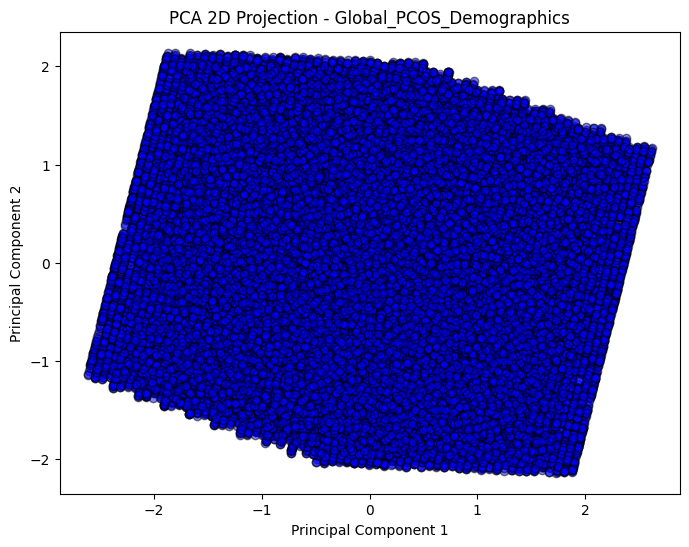

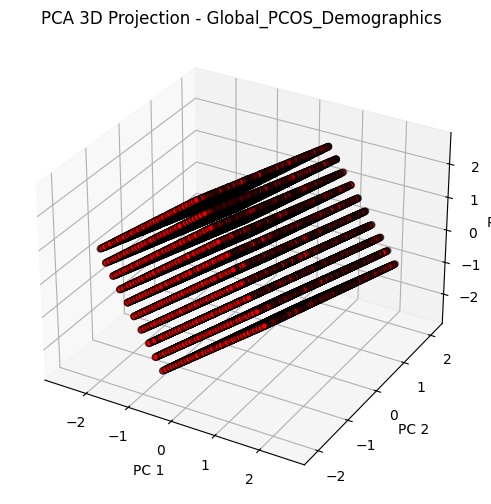


Processing dataset: PCOS_Medication_Reactions
Skipping PCA for PCOS_Medication_Reactions (Not enough numerical features)

Processing dataset: Lifestyle_Diet_Dataset
Explained Variance (2D): 29.26391425188414%
Explained Variance (3D): 38.124956691383225%
Components Needed for 95% Variance: 14
Top 3 Eigenvalues: [2.88991051 1.80283762 1.42095278]



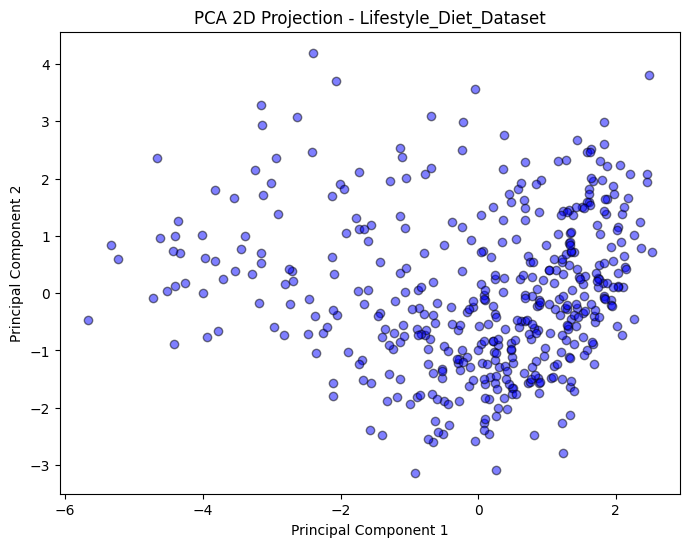

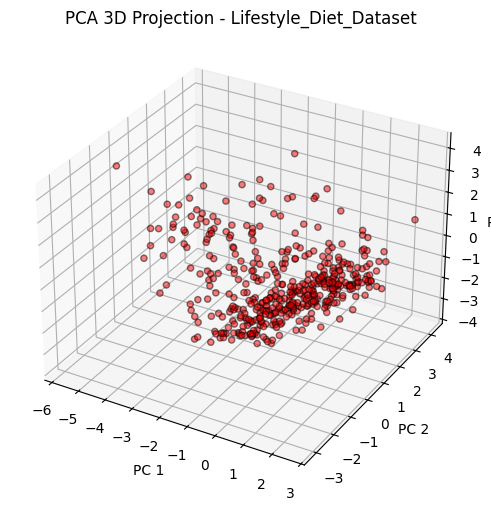


Processing dataset: Core_PCOS_Dataset
Explained Variance (2D): 19.75064431689081%
Explained Variance (3D): 26.10969302260106%
Components Needed for 95% Variance: 35
Top 3 Eigenvalues: [5.24933646 3.44898615 2.80056976]



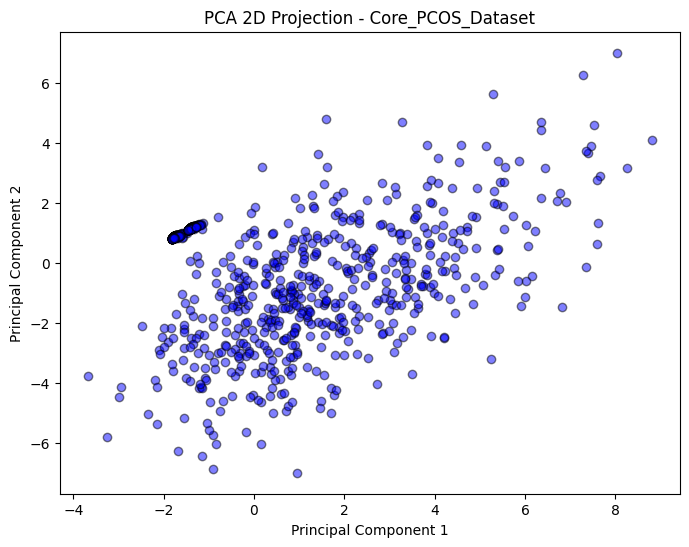

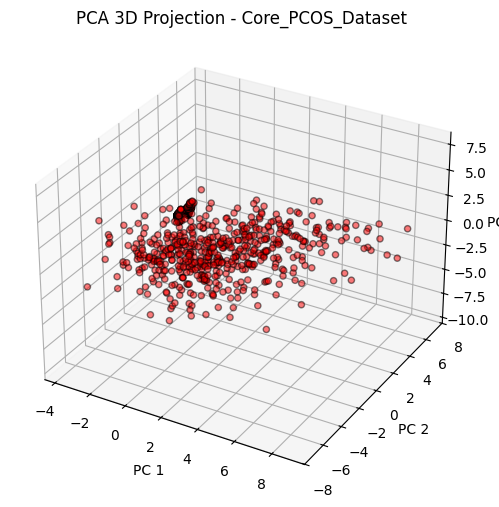


PCA was not performed for the following datasets due to insufficient numerical features:
['PCOS_Medication_Reactions']

PCA Summary for Valid Datasets:
                         Explained Variance (2D) Explained Variance (3D)  \
Global_PCOS_Demographics               66.916238                   100.0   
Lifestyle_Diet_Dataset                 29.263914               38.124957   
Core_PCOS_Dataset                      19.750644               26.109693   

                         Components Needed for 95% Variance  \
Global_PCOS_Demographics                                  3   
Lifestyle_Diet_Dataset                                   14   
Core_PCOS_Dataset                                        35   

                                                          Top 3 Eigenvalues  
Global_PCOS_Demographics  [1.0076450956395402, 0.9998587786946508, 0.992...  
Lifestyle_Diet_Dataset    [2.8899105135994922, 1.802837623511634, 1.4209...  
Core_PCOS_Dataset         [5.249336461232056, 3.4489861

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read datasets into pandas dataframes
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Store PCA results
pca_results = {}
invalid_datasets = []

# Process each dataset
for name, df in datasets.items():
    print(f"\nProcessing dataset: {name}")

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Check if PCA is possible (at least 2 numerical features)
    if numeric_df.shape[1] < 2:
        print(f"Skipping PCA for {name} (Not enough numerical features)")
        invalid_datasets.append(name)
        continue

    # Handle missing values (fill with mean)
    numeric_df.fillna(numeric_df.mean(), inplace=True)

    # Normalize the dataset
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Apply PCA with n_components=2 and n_components=3
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)

    pc_2d = pca_2d.fit_transform(scaled_data)
    pc_3d = pca_3d.fit_transform(scaled_data)

    # Explained variance ratios
    explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_) * 100
    explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100

    # Find number of components needed for 95% variance retention
    pca_full = PCA().fit(scaled_data)
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    components_needed_95 = np.argmax(cumulative_variance >= 0.95) + 1

    # Get top 3 eigenvalues
    top_3_eigenvalues = pca_full.explained_variance_[:3]

    # Store results
    pca_results[name] = {
        "Explained Variance (2D)": explained_variance_2d,
        "Explained Variance (3D)": explained_variance_3d,
        "Components Needed for 95% Variance": components_needed_95,
        "Top 3 Eigenvalues": top_3_eigenvalues
    }

    # Visualizing PCA Results
    print(f"Explained Variance (2D): {explained_variance_2d}%")
    print(f"Explained Variance (3D): {explained_variance_3d}%")
    print(f"Components Needed for 95% Variance: {components_needed_95}")
    print(f"Top 3 Eigenvalues: {top_3_eigenvalues}\n")

    # 2D PCA Scatter Plot
    plt.figure(figsize=(8,6))
    plt.scatter(pc_2d[:, 0], pc_2d[:, 1], alpha=0.5, c='blue', edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA 2D Projection - {name}")
    plt.show()

    # 3D PCA Scatter Plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc_3d[:, 0], pc_3d[:, 1], pc_3d[:, 2], alpha=0.5, c='red', edgecolors='k')
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.set_title(f"PCA 3D Projection - {name}")
    plt.show()

# Display invalid datasets
if invalid_datasets:
    print("\nPCA was not performed for the following datasets due to insufficient numerical features:")
    print(invalid_datasets)

# Convert PCA results to a DataFrame
pca_summary_df = pd.DataFrame(pca_results).T
print("\nPCA Summary for Valid Datasets:")
print(pca_summary_df)


In [3]:
# Process each dataset for PCA transformation visualization without using ace tools
pca_transformations = {}

for name, df in datasets.items():
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Check if PCA is possible (at least 2 numerical features)
    if numeric_df.shape[1] < 2:
        continue

    # Handle missing values (fill with mean)
    numeric_df.fillna(numeric_df.mean(), inplace=True)

    # Normalize the dataset
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Apply PCA with n_components=3
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(scaled_data)

    # Create DataFrames for before and after PCA transformation
    before_pca_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
    after_pca_df = pd.DataFrame(pca_transformed, columns=["PC1", "PC2", "PC3"])

    # Store results
    pca_transformations[name] = {
        "Before PCA": before_pca_df,
        "After PCA": after_pca_df
    }

for name, dfs in pca_transformations.items():
    print(f"\nDataset: {name} - Before PCA (first 5 rows):")
    print(dfs["Before PCA"].head(), "\n")

    print(f"Dataset: {name} - After PCA (first 5 rows):")
    print(dfs["After PCA"].head(), "\n")



Dataset: Global_PCOS_Demographics - Before PCA (first 5 rows):
        Age  Lifestyle_Score  Undiagnosed_PCOS_Likelihood
0 -0.592320        -1.221357                    -0.726813
1 -1.582737        -0.524746                     0.117538
2  0.893306         0.520171                     0.916556
3 -0.493278         1.565089                    -1.315410
4 -0.592320         0.520171                     1.372821 

Dataset: Global_PCOS_Demographics - After PCA (first 5 rows):
        PC1       PC2       PC3
0 -1.400885 -0.345360  0.537644
1 -1.443037  0.307103 -0.785850
2  1.178696  0.710150  0.122520
3  0.428646 -1.677259 -1.194233
4  0.232585  1.196082 -1.010619 


Dataset: Lifestyle_Diet_Dataset - Before PCA (first 5 rows):
   Age in Years  Weight in Kg  Height in Cm _ Feet  \
0     -0.561719     -1.121411             0.668562   
1     -0.561719     -1.300122            -0.120820   
2     -1.049126     -2.014965             0.273871   
3      0.291242     -0.495923             0.142307  